In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [11]:
# Data in the picture but not in excel
categories = ['Total', 'HS or less', 'Some college', 'College+', 'Urban', 'Suburban', 'Rural']
platforms = ['YouTube', 'Facebook', 'Instagram', 'Pinterest', 'TikTok', 'LinkedIn', 'WhatsApp', 'Snapchat', 'Twitter (X)', 'Reddit', 'BeReal']
percentages = [
    [83, 68, 47, 35, 33, 30, 29, 27, 22, 22, 3],
    [74, 63, 37, 26, 35, 10, 25, 26, 15, 14, 3],
    [85, 71, 50, 42, 38, 28, 23, 32, 24, 23, 4],
    [89, 70, 55, 38, 26, 53, 39, 23, 29, 30, 4],
    [85, 66, 53, 31, 36, 31, 38, 29, 25, 29, 4],
    [85, 68, 49, 36, 31, 36, 30, 26, 26, 24, 4],
    [77, 70, 38, 36, 33, 18, 20, 27, 13, 14, 2]
]

# Extract the data into a structured format
new_data = {
    'Platform': [],
    'Dimension': [],
    'Category': [],
    'Percentage': []
}

for category, percentage_list in zip(categories, percentages):
    # Determine dimension based on category
    if category in ['HS or less', 'Some college', 'College+']:
        dimension = 'Education'
    elif category == 'Total':
        dimension = ' '
    else:
        dimension = 'Residence'
    
    for platform, percentage in zip(platforms, percentage_list):
        new_data['Platform'].append(platform)
        new_data['Dimension'].append(dimension)
        new_data['Category'].append(category)
        new_data['Percentage'].append(percentage)

newdf =  pd.DataFrame(new_data)

In [12]:
#import file

dir_cur = os.getcwd() 

data_path = os.path.join(dir_cur, '..', 'data', 'Social Media Usage_pivoted.xlsx')

olddf = pd.read_excel(data_path)

# Concatenate the new data with the existing dataframe
df = pd.concat([olddf, newdf], ignore_index=True)


# Convert '<1' to a numeric value (like 0.5 for visualization purposes)
df['Percentage'] = df['Percentage'].replace('<1', 0.5).astype(float)

# Rename
df['Platform'] = df['Platform'].replace({
    'You Tube': 'YouTube',
    'Be Real': 'BeReal',
    'Linked In': 'LinkedIn',
    'Tik Tok': 'TikTok',
    'Twitter (X)': 'Twitter',
    'Whats App': 'WhatsApp'
})

df['Category'] = df['Category'].replace({
    'Ages 18-29': '18-29',
    'Asian*': 'Asian',
    '$100,000+': 'More than $100K',
    'Less than $30,000' : 'Less than $30K',
    '$30,000- $69,999' : '$30K-$69,999',
    '$70,000- $99,999' : '$70K-$99,999'
})

print(df)

     Platform  Dimension Category  Percentage
0      BeReal        Age    30-49         3.0
1      BeReal        Age    50-64         1.0
2      BeReal        Age      65+         0.5
3      BeReal        Age    18-29        12.0
4    Facebook        Age    30-49        75.0
..        ...        ...      ...         ...
248  WhatsApp  Residence    Rural        20.0
249  Snapchat  Residence    Rural        27.0
250   Twitter  Residence    Rural        13.0
251    Reddit  Residence    Rural        14.0
252    BeReal  Residence    Rural         2.0

[253 rows x 4 columns]


In [13]:
# Group the data
df_total = df[df['Dimension'] == ' ']
df_age = df[df['Dimension'] == 'Age']
df_gender = df[df['Dimension'] == 'Gender']
df_income = df[df['Dimension'] == 'Income']
df_pol = df[df['Dimension'] == 'Political Affiliation']
df_race = df[df['Dimension'] == 'Race & Ethnicity']
df_education = df[df['Dimension'] == 'Education']
df_residence = df[df['Dimension'] == 'Residence']

# Desired order
platform_order = ["YouTube", "Facebook", "Instagram", "Pinterest", "TikTok", "LinkedIn", "WhatsApp", "Snapchat", "Twitter", "Reddit", "BeReal"]
age_order = ['18-29','30-49','50-65','65+']
income_order = ['Less than $30K','$30K-$69,999','$70K-$99,999','More than $100K']
Education_order = ['HS or less', 'Some college', 'College+']

# Helper function to sort DataFrame by category
def sort_by_category(df, category_order):
    df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
    return df.set_index('Category').sort_index()

# Pivot the DataFrame for each category
df_total_pivot = df_total.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_age_pivot = df_age.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_gender_pivot = df_gender.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_income_pivot = df_income.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_pol_pivot = df_pol.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_race_pivot = df_race.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_education_pivot = df_education.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)
df_residence_pivot = df_residence.pivot_table(index='Category', columns='Platform', values='Percentage').reindex(columns=platform_order)

# Age
df_age_sorted = sort_by_category(df_age, age_order)
df_age_pivot = df_age_sorted.pivot_table(index=df_age_sorted.index, columns='Platform', values='Percentage').reindex(columns=platform_order)

# Income
df_income_sorted = sort_by_category(df_income, income_order)
df_income_pivot = df_income_sorted.pivot_table(index=df_income_sorted.index, columns='Platform', values='Percentage').reindex(columns=platform_order)

# Education
df_education_sorted = sort_by_category(df_education, Education_order)
df_education_pivot = df_education_sorted.pivot_table(index=df_education_sorted.index, columns='Platform', values='Percentage').reindex(columns=platform_order)

C:\Users\HONOR\AppData\Local\Temp\ipykernel_36240\1725576297.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
C:\Users\HONOR\AppData\Local\Temp\ipykernel_36240\1725576297.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = pd.Categorical(df['Category'], categories=category_order, ordered=True)
C:\Users\HONOR\AppData\Local\Temp\ipykernel_36240\1725576297.py:19: SettingWithCopyWarning: 
A value is tr

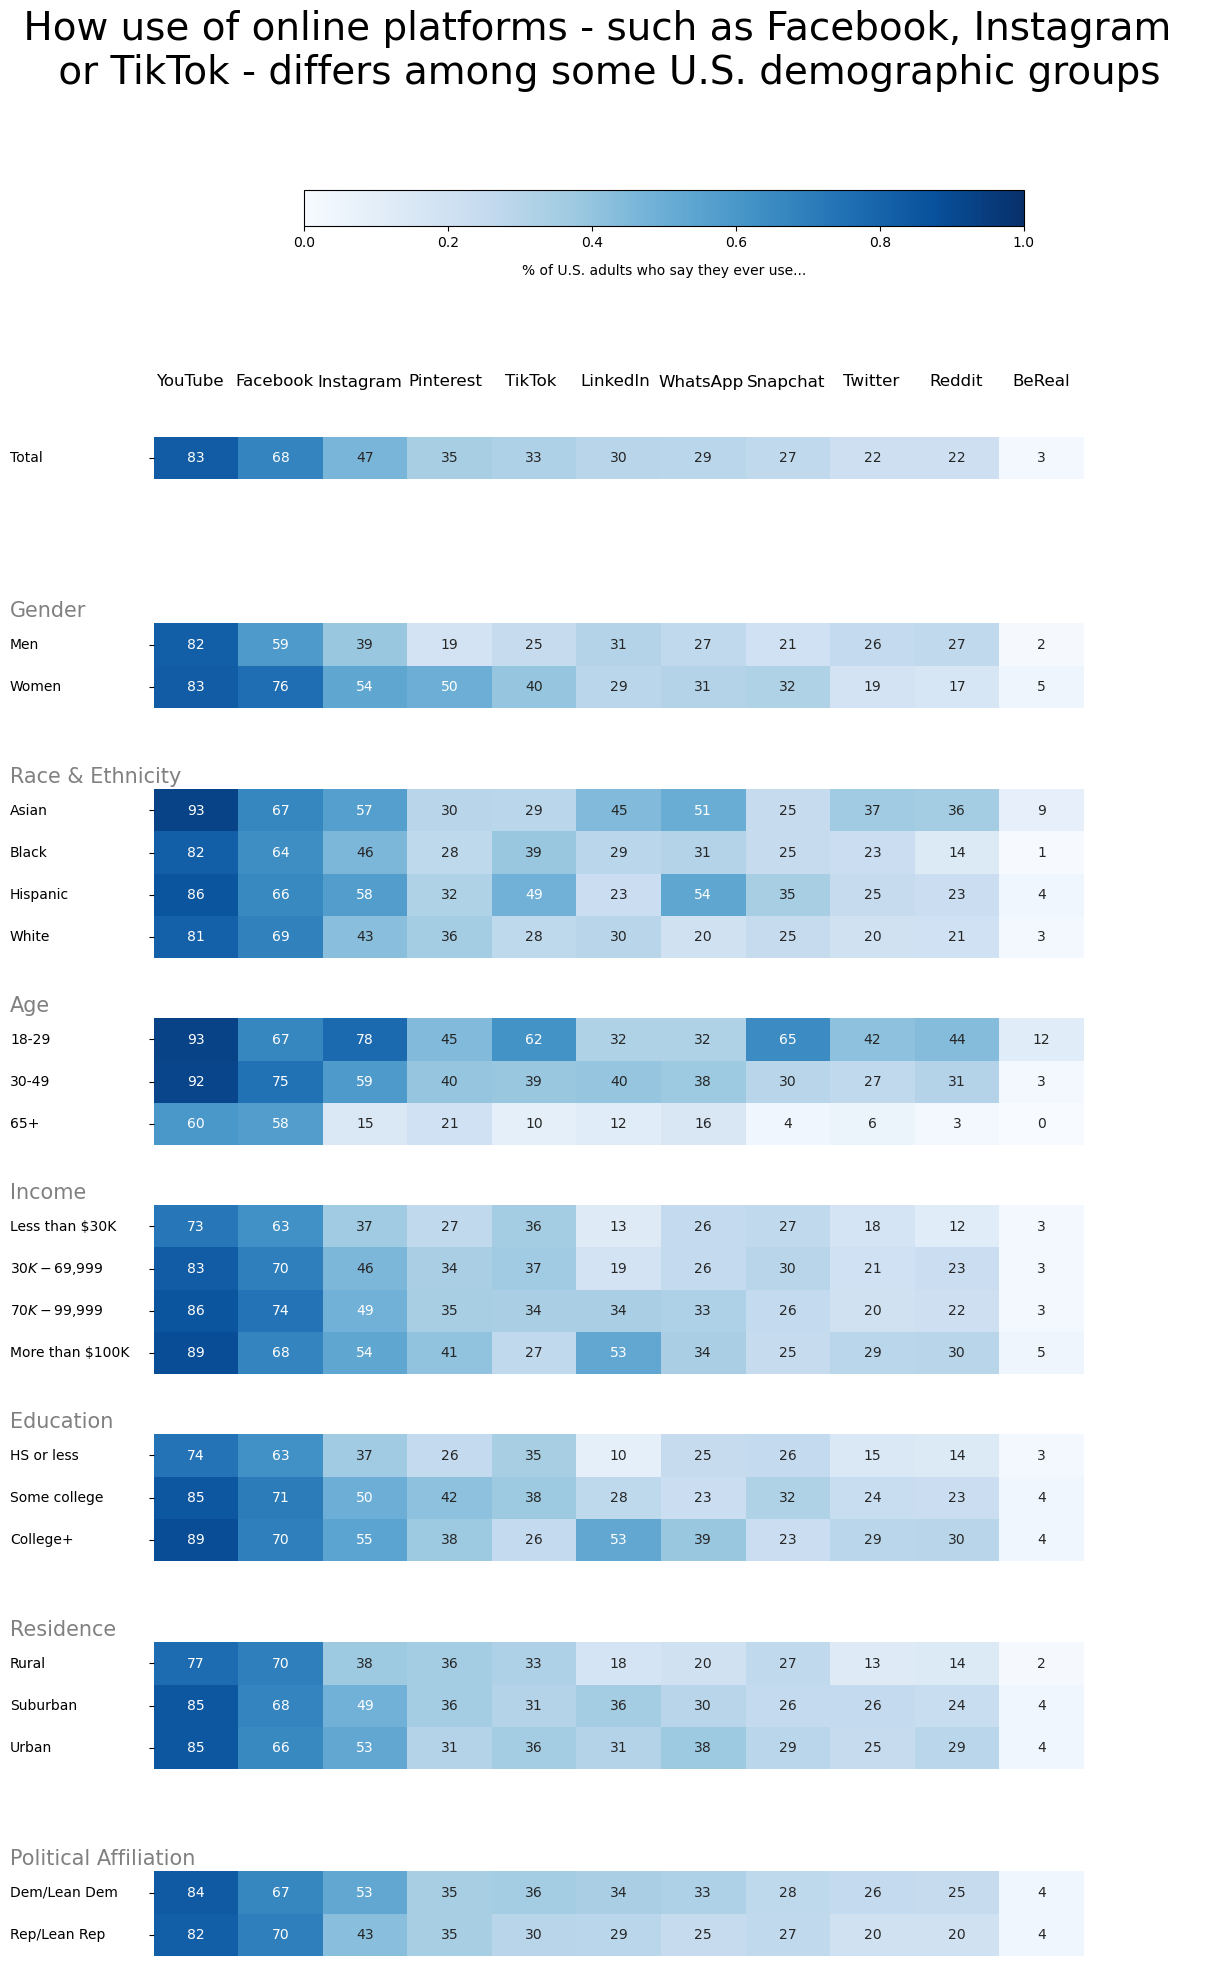

In [14]:
# Set up a global color scale by finding the min and max across all datasets
vmin = 0.5
vmax = 100

# Create subplots and arrange them in a column
n_rows = 8
n_cols = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,24))

# List to store pivots for looping
pivots = [ df_total_pivot, df_gender_pivot, df_race_pivot, df_age_pivot, df_income_pivot, df_education_pivot, df_residence_pivot, df_pol_pivot]
titles = [' ', 'Gender', 'Race & Ethnicity', 'Age', 'Income', 'Education', 'Residence', 'Political Affiliation'] 


# Plot each heatmap
for ax, pivot, title in zip(axes, pivots, titles):
    sns.heatmap(pivot, ax=ax, annot=True, fmt=".0f", cmap="Blues", vmin=vmin, vmax=vmax, cbar=False)
    ax.title.set_visible(False) 
    ax.set_ylabel('')
    ax.xaxis.set_visible(False)  # Hide x-axis labels
    ax.set_aspect(0.5)
    ax.set_title(title)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='left')  # Set y-axis labels horizontal
    ax.yaxis.set_tick_params(pad=100)
    # Add title to the left of the plot
    ax.text(-1.7, -0.3, title, va='center', ha='left', rotation=0, fontsize=15, color='gray')
    
# Add a common colorbar at the top
cbar_ax = fig.add_axes([0.25, 0.89, 0.6, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap="Blues"), cax=cbar_ax, orientation='horizontal')
cbar.ax.set_xlabel('% of U.S. adults who say they ever use...', labelpad=10)

# Add platform names above the heatmaps
platforms = pivots[0].columns.tolist()
for i, platform in enumerate(platforms):
    fig.text(0.155 + i * 0.071, 0.825, platform, ha='center', va='center', fontsize=12)

# Set a common x-axis label
fig.suptitle(' How use of online platforms - such as Facebook, Instagram  \n or TikTok - differs among some U.S. demographic groups', fontsize=28)

plt.subplots_adjust(hspace=-0.5, bottom=0.1 )

# Display the plot
plt.show()